<a href="https://www.kaggle.com/code/neerajkld/usa-real-estate-data?scriptVersionId=146306417" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <span style="color:green;"> **USA Real Estate Listings**

## <span style="color:green;"> **Summary**

<span style="color:green;">**This dataset includes real estate information in USA shows house property, geographical area, price etc. I analyze this dataset to get insights of real estate market in USA, price comparison between different locations, find the trends etc. All the analysed information will be used to create a interactive dashboard in tableau for the visualization of insights**.</span>



## <span style="color:green;"> **Business Task**
        
* <span style="color:green;">**Total properties for sale in each state**
* <span style="color:green;">**Percentage of expensive properties - higher than 500k**     
* <span style="color:green;">**Average house size**        
* <span style="color:green;">**Average price per sqft**      
* <span style="color:green;">**Median price per states for 15 years**      

## <span style="color:green;"> **Prepare & Process**

**<span style="color:green;">I used a dataset called realtor data. This shows real estate data of company called Realtor (http://www.realtor.com). I downloaded the dataset from Kaggle (http://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset). This dataset shows real estate listing in USA. It includes the price, zip codes, state, city, house size, acres in lot etc.This dataset includes 1 csv. file contains 10 columns.
For cleaning I used excel and SQL. For the visualization of insights I used tableau.**


## <span style="color:green;"> **SQL queries**

In [1]:
# Load packages
import pandas as pd
import sqlite3
from sqlalchemy import create_engine, text

import os
for dirname, _,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/realtor-real-estate-usa/realtor-data.zip.csv


In [2]:
#Load data
df = pd.read_csv('/kaggle/input/realtor-real-estate-usa/realtor-data.zip.csv')

In [3]:
# Create a sqlite engine
engine = create_engine('sqlite://', echo=False)

# Export the dataframe as a table to the sqlite engine
df.to_sql("realtor", con =engine, index=False)

110101

In [4]:
# Number of properties listed as ready_to_build by city and state
with engine.begin() as conn:
    query = text("""
    SELECT city, state,
    COUNT(*) AS properties_count 
    FROM realtor
    WHERE status = 'ready_to_build'
    GROUP BY city, state 
    ORDER BY properties_count DESC;
    """)
    df1 = pd.read_sql_query(query, conn)
    
df1

,city,state,properties_count
0,Newtown Square,Pennsylvania,34
1,Middletown,Delaware,24
2,Millis,Massachusetts,13
3,Farmingdale,New Jersey,12
4,Barnegat,New Jersey,10
5,Medford,New Jersey,9
6,Vineland,New Jersey,9
7,Manalapan,New Jersey,8
8,Methuen,Massachusetts,8
9,River Vale,New Jersey,8


In [5]:
# Number of properties listed as for_sale by city and state
with engine.begin() as conn:
    query = text("""
    SELECT city, state,
    COUNT(*) AS properties_count 
    FROM realtor
    WHERE status = 'for_sale'
    GROUP BY city, state 
    ORDER BY properties_count DESC;
    """)
    df2 = pd.read_sql_query(query, conn)
    
df2

,city,state,properties_count
0,New York City,New York,6560
1,Philadelphia,Pennsylvania,5417
2,New York,New York,4998
3,Brooklyn,New York,3012
4,Staten Island,New York,1578
...,...,...,...
3058,Windham,Vermont,1
3059,Woodstock,New York,1
3060,Woodville,Maine,1
3061,Wyman Township,Maine,1


In [6]:
# Average number of house_size property that are ready to sale
with engine.begin() as conn:
    query = text("""
    SELECT AVG(house_size) AS avg_housesize
    FROM realtor
    WHERE status ='for_sale';
    """)
    df3 = pd.read_sql_query(query, conn)
    
df3

,avg_housesize
0,2156.287691


In [7]:
# Average number of bedrooms and bathrooms for properties that are ready to sale 
with engine.begin() as conn:
    query = text("""
    SELECT AVG(bed) AS avg_bedrooms,
    AVG(bath) AS avg_bathrooms
    FROM realtor
    WHERE status = 'for_sale';
    """)
    df4 = pd.read_sql_query(query, conn)
    
df4

,avg_bedrooms,avg_bathrooms
0,3.314522,2.517547


In [8]:
# Average price for square feet for different states
with engine.begin() as conn:
    query = text("""
    SELECT state,
    ROUND(AVG(price / house_size)) AS avg_price_per_sqft 
    FROM realtor
    WHERE house_size IS NOT NULL
    GROUP BY state 
    ORDER BY state;
    """)
    df5 = pd.read_sql_query(query, conn)
    
df5

,state,avg_price_per_sqft
0,Connecticut,265.0
1,Delaware,178.0
2,Georgia,150.0
3,Maine,262.0
4,Massachusetts,492.0
5,New Hampshire,260.0
6,New Jersey,279.0
7,New York,1002.0
8,Pennsylvania,237.0
9,Puerto Rico,232.0


In [9]:
# Average, min and max prices by city
with engine.begin() as conn:
    query = text("""
    SELECT city, 
    ROUND(AVG(price)) AS avg_price, 
    MIN(price) AS min_price,
    MAX(price) AS max_price
    FROM realtor
    WHERE price IS NOT NULL AND city IS NOT NULL
    GROUP BY city
    ORDER BY city;
    """)
    df6 = pd.read_sql_query(query, conn)
    
df6

,city,avg_price,min_price,max_price
0,Abbot,158950.0,21900.0,425000.0
1,Aberdeen,443535.0,49000.0,849900.0
2,Abington,677719.0,229000.0,7900000.0
3,Absecon,258222.0,9900.0,799900.0
4,Absecon Highlands,89000.0,89000.0,89000.0
...,...,...,...,...
2482,Yauco,335294.0,32500.0,4000000.0
2483,Yeadon,198200.0,25000.0,280000.0
2484,Yonkers,402241.0,44900.0,2199000.0
2485,York,895878.0,21000.0,5950000.0


In [10]:
# Median price by state
with engine.begin() as conn:
    query = text("""
    SELECT state, AVG(price) AS median_price
    FROM (
        SELECT state, price,
           ROW_NUMBER() OVER (PARTITION BY state ORDER BY price) AS row_num,
           COUNT(*) OVER (PARTITION BY state) AS total_count
        FROM realtor
    ) AS sub
    WHERE row_num IN ((total_count + 1) / 2, (total_count + 2) / 2)
    GROUP BY state;
    """)
    df7 = pd.read_sql_query(query, conn)
    
df7

,state,median_price
0,Connecticut,339900.0
1,Delaware,315000.0
2,Georgia,490225.0
3,Maine,179900.0
4,Massachusetts,589900.0
5,New Hampshire,339900.0
6,New Jersey,425000.0
7,New York,829900.0
8,Pennsylvania,299900.0
9,Puerto Rico,170000.0


In [11]:
# 5 most expensive states and cities by average price
with engine.begin() as conn:
    query = text("""
    SELECT state, city, ROUND(AVG(price),0) AS avg_price
    FROM realtor
    GROUP BY state, city
    ORDER BY avg_price DESC
    LIMIT 5;
    """)
    df8 = pd.read_sql_query(query, conn)
    
df8

,state,city,avg_price
0,Massachusetts,Waterfront,12000000.0
1,New York,Rochdale Village,9800000.0
2,New Jersey,Middletown Township,9200000.0
3,Massachusetts,Woods Hole,8583000.0
4,Massachusetts,Chilmark,6918750.0


In [12]:
# Average price for acre_lot (land size in acres) for different states
with engine.begin() as conn:
    query = text("""
    SELECT state,
    ROUND(AVG(price / acre_lot)) AS avg_price_per_acres
    FROM realtor
    WHERE acre_lot IS NOT NULL
    GROUP BY state
    ORDER BY state;
    """)
    df9 = pd.read_sql_query(query, conn)
    
df9

,state,avg_price_per_acres
0,Connecticut,1369328.0
1,Delaware,2817681.0
2,Georgia,159341.0
3,Maine,529695.0
4,Massachusetts,5028862.0
5,New Hampshire,722031.0
6,New Jersey,3916819.0
7,New York,15349369.0
8,Pennsylvania,8892407.0
9,Puerto Rico,3453119.0


In [13]:
# Find mean, min and max houses sizes by state and city

# Query for states
with engine.begin() as conn:
    state_query = text("""
   SELECT state,
    ROUND(AVG(house_size), 0) AS avg_size,
    MIN(house_size) AS min_size,
    MAX(house_size) AS max_size
    FROM realtor
    WHERE house_size IS NOT NULL
    GROUP BY state
    ORDER BY state;
    """)
    state_df10 = pd.read_sql_query(state_query, conn)
    
# Query for cities
with engine.begin() as conn:
    city_query = text("""
    SELECT city,
    ROUND(AVG(house_size), 0) AS avg_size,
    MIN(house_size) AS min_size,
    MAX(house_size) AS max_size
    FROM realtor
    WHERE house_size IS NOT NULL
    GROUP BY city
    ORDER BY city;
    """)
    city_df10 = pd.read_sql_query(city_query, conn)
    

In [14]:
print("State Data:")
print(state_df10)

print("\nCity Data:")
print(city_df10)

State Data:
             state  avg_size  min_size   max_size
0      Connecticut    2223.0     100.0    99999.0
1         Delaware    2108.0     440.0    11725.0
2          Georgia    3389.0    3116.0     3661.0
3            Maine    2070.0     128.0    35388.0
4    Massachusetts    2280.0     104.0    99999.0
5    New Hampshire    2252.0     273.0    21500.0
6       New Jersey    2328.0     165.0   400149.0
7         New York    1932.0     122.0    94263.0
8     Pennsylvania    1863.0     100.0    74340.0
9      Puerto Rico    2808.0     181.0  1450112.0
10    Rhode Island    2152.0     207.0    22774.0
11         Vermont    2354.0     160.0    16893.0
12  Virgin Islands    4095.0     235.0    49658.0
13   West Virginia    1860.0    1860.0     1860.0
14         Wyoming    1935.0    1935.0     1935.0

City Data:
          city  avg_size  min_size  max_size
0         None    2278.0     992.0    6343.0
1        Abbot    1696.0    1600.0    1792.0
2     Aberdeen    1919.0     810.0    310

In [15]:
# find out Percentage of expensive properties - higher than 500k
with engine.begin() as conn:
    query = text("""
    SELECT COUNT(*) AS total_properties,
       SUM(CASE WHEN price > 500000 THEN 1 ELSE 0 END) AS expensive_properties,
       (SUM(CASE WHEN price > 500000 THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS percentage_expensive
    FROM realtor
    GROUP BY price
    ORDER BY price;
    """)
    df11 = pd.read_sql_query(query, conn)
    
df11

,total_properties,expensive_properties,percentage_expensive
0,18,0,0
1,4,0,0
2,4,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7133,1,1,100
7134,1,1,100
7135,1,1,100
7136,1,1,100


In [16]:
# Percentage of expensive properties - higher than 500k
with engine.begin() as conn:
    query = text("""
    SELECT (COUNT(*) FILTER (WHERE price > 500000) * 100.0 / COUNT(*)) AS percentage_expensive
FROM realtor;
    """)
    df12 = pd.read_sql_query(query, conn)
    
df12


,percentage_expensive
0,43.922399


In [17]:
# List of properties that is more expensive than average price in this state
with engine.begin() as conn:
    query = text("""
    WITH state_avg_price AS (
        SELECT state, ROUND(AVG(price)) AS avg_price
        FROM realtor
        GROUP BY state
    )
    SELECT rd.*,
           cap.avg_price AS state_average_price
    FROM realtor rd
    JOIN state_avg_price cap ON rd.state = cap.state
    WHERE rd.price > cap.avg_price;
    """)
    df13 = pd.read_sql_query(query, conn)
    
df13

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,state_average_price
0,for_sale,6.0,6.0,0.94,Penuelas,Puerto Rico,624.0,9297.0,None,3900000.0,677452.0
1,for_sale,6.0,5.0,0.12,Aguada,Puerto Rico,602.0,6000.0,None,10000000.0,677452.0
2,for_sale,3.0,3.0,NaN,Aguada,Puerto Rico,602.0,2715.0,None,720000.0,677452.0
3,for_sale,NaN,6.0,0.06,Rincon,Puerto Rico,602.0,NaN,None,3250000.0,677452.0
4,for_sale,5.0,3.0,8.74,Aguada,Puerto Rico,602.0,5517.0,None,1399000.0,677452.0
...,...,...,...,...,...,...,...,...,...,...,...
28275,for_sale,4.0,5.0,1.28,Armonk,New York,10504.0,4280.0,None,2449000.0,1843409.0
28276,for_sale,4.0,7.0,3.94,Armonk,New York,10504.0,6806.0,18-06-2002,4999999.0,1843409.0
28277,for_sale,6.0,7.0,3.79,Armonk,New York,10504.0,9000.0,27-09-2017,5895000.0,1843409.0
28278,for_sale,NaN,NaN,20.68,Armonk,New York,10504.0,NaN,None,2800000.0,1843409.0


In [18]:
# List of properties that is more expensive than average price in this city
with engine.begin() as conn:
    query = text("""
    WITH city_avg_price AS (
        SELECT city, ROUND(AVG(price)) AS avg_price
        FROM realtor
        GROUP BY city
    )
    SELECT rd.*,
           cap.avg_price AS city_average_price
    FROM realtor rd
    JOIN city_avg_price cap ON rd.city = cap.city
    WHERE rd.price > cap.avg_price;
    """)
    df14 = pd.read_sql_query(query, conn)
    
df14

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,city_average_price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,None,105000.0,92500.0
1,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,None,300000.0,238200.0
2,for_sale,3.0,2.0,0.08,Juana Diaz,Puerto Rico,795.0,1045.0,None,150000.0,109106.0
3,for_sale,3.0,2.0,0.10,Lares,Puerto Rico,669.0,4161.0,None,155000.0,144416.0
4,for_sale,5.0,5.0,0.74,Ponce,Puerto Rico,731.0,2677.0,None,649000.0,227003.0
...,...,...,...,...,...,...,...,...,...,...,...
38160,for_sale,6.0,8.0,3.39,Armonk,New York,10504.0,7584.0,28-02-2001,3650000.0,2567967.0
38161,for_sale,4.0,7.0,3.94,Armonk,New York,10504.0,6806.0,18-06-2002,4999999.0,2567967.0
38162,for_sale,6.0,7.0,3.79,Armonk,New York,10504.0,9000.0,27-09-2017,5895000.0,2567967.0
38163,for_sale,NaN,NaN,20.68,Armonk,New York,10504.0,NaN,None,2800000.0,2567967.0


In [19]:
# List of properties that is more expensive than average price in house_size
with engine.begin() as conn:
    query = text("""
    WITH house_size_avg_price AS (
        SELECT house_size, ROUND(AVG(price)) AS avg_price
        FROM realtor
        GROUP BY house_size
    )
    SELECT rd.*,
           cap.avg_price AS house_size_average_price
    FROM realtor rd
    JOIN house_size_avg_price cap ON rd.house_size = cap.house_size
    WHERE rd.price > cap.avg_price;
    """)
    df15 = pd.read_sql_query(query, conn)
    
df15


,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,house_size_average_price
0,for_sale,9.0,7.0,0.46,Mayaguez,Puerto Rico,680.0,3709.0,None,650000.0,587500.0
1,for_sale,6.0,5.0,0.12,Aguada,Puerto Rico,602.0,6000.0,None,10000000.0,6055186.0
2,for_sale,NaN,1.0,NaN,Mayaguez,Puerto Rico,682.0,390.0,None,125000.0,79725.0
3,for_sale,9.0,8.0,0.17,Rincon,Puerto Rico,677.0,3852.0,None,950000.0,910600.0
4,for_sale,NaN,6.0,1.38,Quebradillas,Puerto Rico,678.0,3000.0,None,3000000.0,1380265.0
...,...,...,...,...,...,...,...,...,...,...,...
22848,for_sale,3.0,4.0,3.32,Armonk,New York,10504.0,2452.0,15-02-2007,1250000.0,807174.0
22849,for_sale,6.0,7.0,1.72,Armonk,New York,10504.0,6793.0,30-08-2002,2395000.0,1947500.0
22850,for_sale,4.0,5.0,1.28,Armonk,New York,10504.0,4280.0,None,2449000.0,1747833.0
22851,for_sale,4.0,7.0,3.94,Armonk,New York,10504.0,6806.0,18-06-2002,4999999.0,3499000.0


In [20]:
# Distribution of properties based on their price, prev_sold_date, and city
with engine.begin() as conn:
    query = text("""
   SELECT city,
       COUNT(*) AS total_properties,
       AVG(price) AS avg_price,
       MIN(prev_sold_date) AS earliest_sold_date,
       MAX(prev_sold_date) AS latest_sold_date
FROM realtor
GROUP BY city
ORDER BY city;
""")
    df16 = pd.read_sql_query(query, conn)
    
df16

,city,total_properties,avg_price,earliest_sold_date,latest_sold_date
0,None,22,387295.409091,None,None
1,Abbot,4,158950.000000,None,None
2,Aberdeen,49,443534.571429,01-05-2019,31-03-2014
3,Abington,29,677718.620690,02-04-2001,31-08-2007
4,Absecon,62,258221.903226,01-06-2018,31-12-2002
...,...,...,...,...,...
2483,Yauco,17,335294.117647,None,None
2484,Yeadon,8,198200.000000,08-08-2006,24-04-2015
2485,Yonkers,324,402241.416667,01-02-2001,31-07-2014
2486,York,48,895878.187500,17-01-2017,26-05-2017


## <span style="color:green;"> **Share - Using Power Bi**

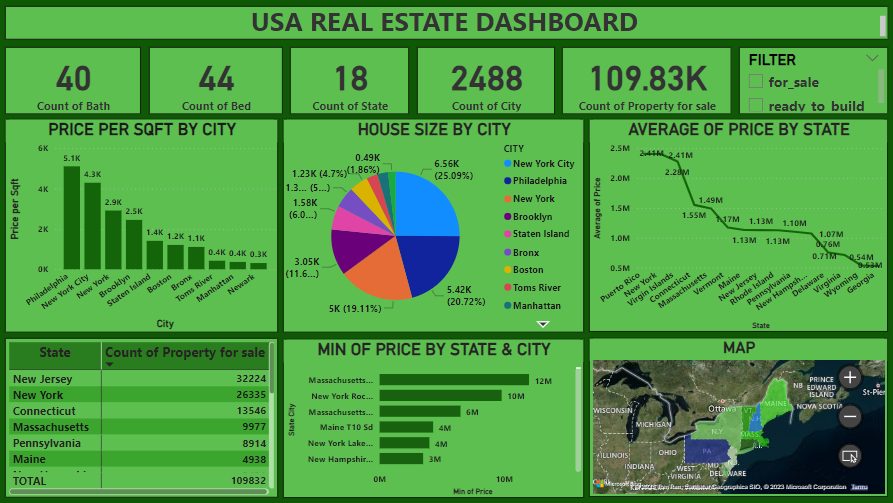